In [1]:
##Import libraries
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
import keras

In [3]:
IMAGE_SIZE = 64
# Base model with MobileNetV2
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

In [4]:
base_model = keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [5]:
base_model.trainable = False

In [6]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [7]:
# Trainable classification head
maxpool_layer = keras.layers.GlobalMaxPooling2D()
prediction_layer = keras.layers.Dense(1, activation='sigmoid')

In [8]:
#learning_rate = 0.0001

classifier = keras.Sequential([
    base_model,
    maxpool_layer,
    prediction_layer
])

In [9]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
classifier.compile(optimizer=keras.optimizers.Adam(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [12]:
## Scaling test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
## Importing training data
train_set = train_datagen.flow_from_directory('train_set',
                                               target_size=(64,64),
                                               batch_size=6,
                                               class_mode='binary')

Found 2000 images belonging to 2 classes.


In [14]:
train_set.class_indices

{'Burnt_Pizza': 0, 'Good_Pizza': 1}

In [15]:
## Importng test data
test_set = test_datagen.flow_from_directory('test_set',
                                            target_size=(64, 64),
                                            batch_size=6,
                                            class_mode='binary')

Found 100 images belonging to 2 classes.


In [16]:
test_set.class_indices

{'Burnt_Pizza': 0, 'Good_Pizza': 1}

In [17]:
## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=98,
        epochs=1,
        validation_data=test_set,
        validation_steps=38)


Epoch 1/1
98/98 [==============================] - 53s 542ms/step - loss: 0.6723 - accuracy: 0.5765 - val_loss: 0.8787 - val_accuracy: 0.5312


In [24]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('inference/good1.jpg'
                           ,target_size =(64,64))

#marker Camilin Marker/IMG_20190522_115308_014.jpg
#earphone     Earphones/IMG_20190522_115610_014.jpg
#keychain     batman Keychain/IMG_20190522_115408_014.jpg   

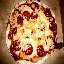

In [25]:
test_image

In [26]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [27]:
## For single prediction change the dimension using axis. To remove problem of batch
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)

In [28]:
result=result.argmax()

In [29]:
result

0

In [ ]:
## print label

if result == 0:
    prediction = 'Marker'
elif result == 1:
    prediction = 'Earphones'
else:
    prediction = 'Keychain'
    

In [ ]:
prediction

In [ ]:
# fit_ > forward , backward
# error > backward 
# data > forward

# evaluate > only forward

In [ ]:
# in RNN in addition to the error the data is also back propogated 



In [ ]:
# problem in regular neural network

# vanishing gradient
# Exploding gradient , use some fn like relu to avoid it

# In RNN the above is amplified >> this is a issue un RNN as the output is aslo fed as input it will be more than the regular nn

# this is over come by LSTM 